In [1]:
import set_sys_path

In [2]:
# Load data from task 2
from classy.model.data.read import Reader
reader = Reader()
full_data = reader.load_data("task_2")

In [3]:
full_data

,0,1,2,3,4,5,6,7,8,9,...,speed_limit_60,speed_limit_80,speed_limit_80_lifted,right_of_way_crossing,right_of_way_general,give_way,stop,no_speed_limit_general,turn_right_down,turn_left_down
10711,41,43,46,46,46,46,46,47,47,46,...,3,5,6,11,12,13,14,32,0,39
6694,28,26,25,28,28,24,27,29,28,31,...,3,5,6,11,0,13,14,32,38,39
8968,255,255,255,254,173,64,133,136,59,49,...,3,5,6,11,12,0,14,32,38,39
2739,255,254,252,250,249,250,250,251,253,233,...,3,0,6,11,12,13,14,32,38,39
2724,15,14,15,15,18,20,19,20,19,19,...,3,0,6,11,12,13,14,32,38,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,96,94,93,82,63,56,77,87,64,60,...,3,5,6,11,0,13,14,32,38,39
450,43,42,42,42,43,44,44,44,42,41,...,0,5,6,11,12,13,14,32,38,39
6631,16,16,17,19,21,21,20,20,19,17,...,3,5,6,11,0,13,14,32,38,39
6212,25,21,26,36,42,53,63,60,39,67,...,3,5,6,11,0,13,14,32,38,39


### From the data exploration section, we know that the correct label for an instance is always the one set to 0; vamos!

In [4]:
# To make sure just one more time, row 450 (above) should be speed_limit_60
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Here too we need to split instances and labels into different dataframes
instances_and_atributes = full_data.iloc[:, :2304]
labels = full_data.iloc[:, 2304:]

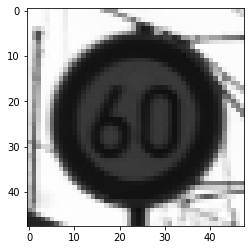

In [6]:
# Let's viz row 450
random_row = instances_and_atributes.sample(1)
image = instances_and_atributes.iloc[450,].to_numpy()
imrs = image.reshape((48,48))
plt.imshow(imrs, cmap='gray', vmin=0, vmax=255)

In [7]:
# Booooom! 😀

Now the actual dimensionality reduction, aka feature selection (unless there's a subtle difference I'm missing?)

Reducing dimensionality increases an (estimator, machine learning algorithm)'s accuracy.

I'm seing that the space around the images is noise and can be removed and retail the meaning of the picture. But it's different spaces for each image, and maybe some don't even have this noise. It has to be done algorithmically, but how?

scikitlearn has algorithms `sklearn.feature_selection` that can help with this.

In [8]:
# First of all, do we have empty fields?
[nothing().any().any() for nothing in (getattr(instances_and_atributes, func) for func in ("isna", "isnull"))]

[False, False]

In [9]:
# Alright. We continue.

# Let's remove features with low variance
from sklearn.feature_selection import VarianceThreshold 

In [10]:
instances_and_atributes

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
10711,41,43,46,46,46,46,46,47,47,46,...,37,38,38,39,40,43,43,43,44,45
6694,28,26,25,28,28,24,27,29,28,31,...,79,106,67,32,25,23,23,23,24,25
8968,255,255,255,254,173,64,133,136,59,49,...,58,67,60,55,37,27,32,48,52,40
2739,255,254,252,250,249,250,250,251,253,233,...,140,129,136,137,136,137,140,132,128,132
2724,15,14,15,15,18,20,19,20,19,19,...,15,13,12,12,12,12,13,14,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,96,94,93,82,63,56,77,87,64,60,...,109,110,110,110,109,109,109,110,111,110
450,43,42,42,42,43,44,44,44,42,41,...,19,19,20,20,20,21,21,20,19,19
6631,16,16,17,19,21,21,20,20,19,17,...,25,23,23,23,24,25,27,29,26,22
6212,25,21,26,36,42,53,63,60,39,67,...,39,41,26,20,25,40,58,57,44,29


In [11]:
selekta = VarianceThreshold(threshold=(.8 * (1 - .8))) # This is >= 80% probability that the features are similar

In [12]:
selected = selekta.fit_transform(instances_and_atributes)

In [13]:
selected.shape

(12660, 2304)

In [14]:
# No change, trying with 0.5
selekta = VarianceThreshold(threshold=(.5 * (1 - .5)))
selected = selekta.fit_transform(instances_and_atributes)

In [15]:
selected.shape

(12660, 2304)

In [16]:
# Any less than that is just too low, so this is not working for this dataset. Will need a more sophisticated
# feature selector.

In [17]:
instances_and_atributes.shape

(12660, 2304)

In [18]:
# Next, let's try univariate feature selection
from sklearn.feature_selection import SelectKBest, chi2

#### Actually I'll do it during training, that way I can train the model on data that has had it's dimension reduced by various algoriths, see which one produces a dataset with the best accuracy.
#### For now, I'll create the class attribute, save that and use it in the model training notebook

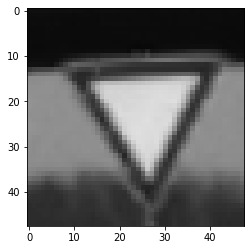

In [19]:
# We know the actual label is the one with a zero for that instance
random_row = instances_and_atributes.sample(1)
image = random_row.to_numpy()
imrs = image.reshape((48,48))
plt.imshow(imrs, cmap='gray', vmin=0, vmax=255)

In [20]:
labels.iloc[random_row.index]

,speed_limit_60,speed_limit_80,speed_limit_80_lifted,right_of_way_crossing,right_of_way_general,give_way,stop,no_speed_limit_general,turn_right_down,turn_left_down
5925,3,5,6,11,0,13,14,32,38,39


In [134]:
# There it is.
# So we make the mapping the labels to their original numerical values
label_mappings = {
    "speed_limit_60": 3,
    "speed_limit_80": 5,
    "speed_limit_80_lifted": 6,
    "right_of_way_crossing": 11,
    "right_of_way_general": 12,
    "give_way": 13,
    "stop": 14,
    "no_speed_limit_general": 32,
    "turn_right_down": 38,
    "turn_left_down": 39,
}


In [77]:
# So we make a new dataframe of one column that substitutes a zero with the original label's numerical value

import pandas

def make_class_attr():
    class_attributes = []
    for lb in labels.itertuples():
        for l in label_mappings.keys():
            if getattr(lb, l) == 0:
                class_attributes.append(label_mappings[l])
    return class_attributes

In [73]:
# Okay, now we make sure the labels df is sorted by labels
labels = labels.sort_index()

In [74]:
labels

,speed_limit_60,speed_limit_80,speed_limit_80_lifted,right_of_way_crossing,right_of_way_general,give_way,stop,no_speed_limit_general,turn_right_down,turn_left_down
0,0,5,6,11,12,13,14,32,38,39
1,0,5,6,11,12,13,14,32,38,39
2,0,5,6,11,12,13,14,32,38,39
3,0,5,6,11,12,13,14,32,38,39
4,0,5,6,11,12,13,14,32,38,39
...,...,...,...,...,...,...,...,...,...,...
12655,3,5,6,11,12,13,14,32,38,0
12656,3,5,6,11,12,13,14,32,38,0
12657,3,5,6,11,12,13,14,32,38,0
12658,3,5,6,11,12,13,14,32,38,0


In [78]:
# Okay, now were sure the values produced will match the instances
labels_df = pandas.DataFrame(make_class_attr(), columns=['label'])

In [79]:
labels_df

,label
0,3
1,3
2,3
3,3
4,3
...,...
12655,39
12656,39
12657,39
12658,39


In [80]:
# Okay, now we concantenate this with the instances_and_attributes dataframe
# first we also sort it by index
instances_and_atributes = instances_and_atributes.sort_index()

In [81]:
instances_and_atributes

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,30,29,28,29,31,30,29,28,27,26,...,31,32,35,38,39,39,40,39,39,38
1,31,31,33,32,31,30,29,28,28,28,...,32,34,35,36,36,37,38,38,37,37
2,30,30,31,29,28,27,26,28,30,31,...,33,35,37,37,38,39,38,38,39,40
3,26,25,24,24,24,27,28,29,29,30,...,32,34,36,37,38,42,40,37,36,36
4,25,26,28,28,28,28,28,27,26,25,...,30,31,33,37,38,37,36,36,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,8,8,7,7,8,8,8,8,8,8,...,11,10,9,9,10,9,9,10,11,11
12656,7,7,8,8,9,8,8,9,8,9,...,10,10,10,9,9,9,9,9,9,9
12657,9,10,9,9,9,9,11,10,10,10,...,9,9,9,9,8,9,9,10,9,9
12658,8,7,6,6,6,6,7,6,6,6,...,10,9,9,9,9,9,10,10,9,9


In [83]:
# Now we concantenate them
labeled_df = pandas.concat([instances_and_atributes, labels_df], axis=1)

In [84]:
labeled_df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,30,29,28,29,31,30,29,28,27,26,...,32,35,38,39,39,40,39,39,38,3
1,31,31,33,32,31,30,29,28,28,28,...,34,35,36,36,37,38,38,37,37,3
2,30,30,31,29,28,27,26,28,30,31,...,35,37,37,38,39,38,38,39,40,3
3,26,25,24,24,24,27,28,29,29,30,...,34,36,37,38,42,40,37,36,36,3
4,25,26,28,28,28,28,28,27,26,25,...,31,33,37,38,37,36,36,35,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,8,8,7,7,8,8,8,8,8,8,...,10,9,9,10,9,9,10,11,11,39
12656,7,7,8,8,9,8,8,9,8,9,...,10,10,9,9,9,9,9,9,9,39
12657,9,10,9,9,9,9,11,10,10,10,...,9,9,9,8,9,9,10,9,9,39
12658,8,7,6,6,6,6,7,6,6,6,...,9,9,9,9,9,10,10,9,9,39


In [86]:
labeled_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
5169,255,255,255,255,255,255,255,255,255,255,...,212,255,255,255,255,255,255,255,255,12
3191,40,39,39,39,38,38,39,37,37,38,...,137,97,57,40,33,31,29,29,30,5
10809,135,153,147,124,103,90,70,69,89,115,...,86,117,136,119,81,50,43,47,48,38
2021,30,30,30,31,30,30,31,31,31,30,...,25,22,20,17,17,18,18,19,20,5
3945,255,255,255,255,244,215,225,168,136,222,...,52,90,116,118,123,124,138,143,135,11
12186,159,158,158,158,158,158,159,159,160,159,...,90,89,90,94,98,99,93,88,84,38
8843,255,255,255,255,255,255,255,255,255,255,...,230,230,229,232,227,228,227,230,225,13
5501,43,39,39,43,39,39,44,49,46,41,...,41,40,39,40,41,43,38,33,29,12
8483,129,127,129,128,124,121,122,123,124,121,...,144,210,209,177,221,221,222,194,42,13
9932,55,56,56,55,55,55,55,55,55,55,...,180,182,184,182,180,179,179,177,176,14


Int64Index([1277], dtype='int64')
Int64Index([12597], dtype='int64')
Int64Index([8646], dtype='int64')


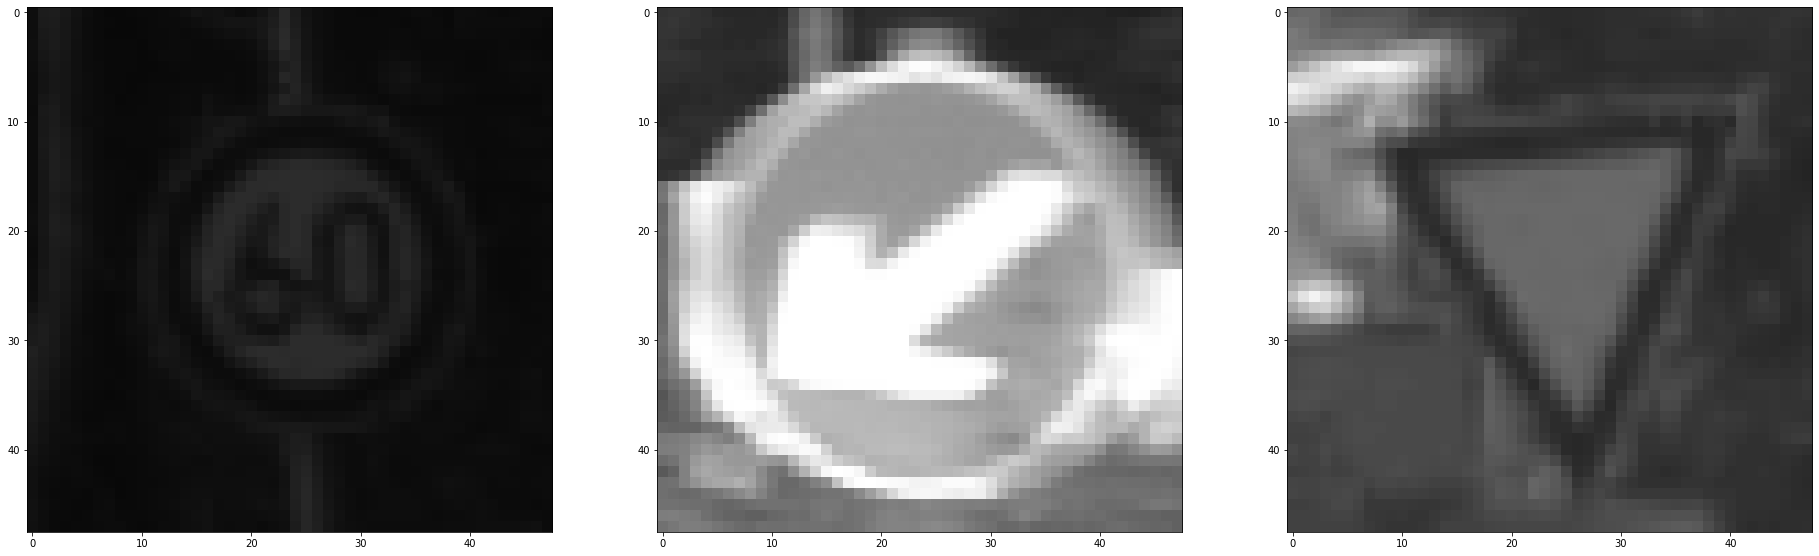

In [141]:
# Now for the acid test. Let's visualize three random images to make sure they are labeled right

figure = plt.figure(figsize=(32, 32))

for r in range(1,4):
    random_row = instances_and_atributes.sample(1)
    image = random_row.to_numpy()
    imrs = image.reshape((48,48))
    figure.add_subplot(1, 3, r)
    print(random_row.index)
    plt.imshow(imrs, cmap='gray', vmin=0, vmax=255)
plt.show()

In [140]:
# Okay, now we visualize them indivisually to confirm.

# The viz function
def visualize_image(instance_index):
    # Flip the labels dict
    local_label_mappings = {v:k for k,v in label_mappings.items()}
    print(local_label_mappings[labeled_df.iloc[instance_index]['label']])
    plt.imshow(
        instances_and_atributes.iloc[instance_index].to_numpy().reshape((48,48)),
        cmap='gray', vmin=0, vmax=255
    )

speed_limit_60


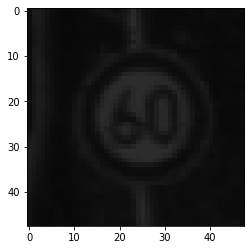

In [142]:
visualize_image(1277)

turn_left_down


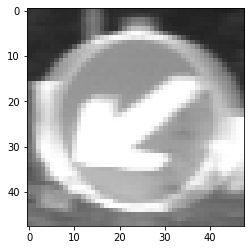

In [143]:
visualize_image(12597)

give_way


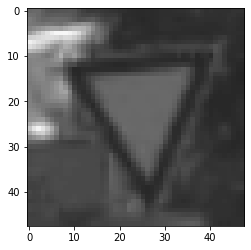

In [144]:
visualize_image(8646)

#### Checks out 🙂

In [148]:
# Save the labeled dataframe and move to the Naive Bayes classifier
from classy.model.data.write import Writer
writer = Writer()
writer.store_dataframe(labeled_df, "dataframe_with_class_attribute")